# Multi-Class Prediction of Obesity Risk

The goal of this work is to estimate obesility levels based on factors like eating habits and physical activity in individuals.

### Import libraries

In [119]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [91]:
#Import data
df_train = pd.read_csv('train.csv')
df_test_kaggle = pd.read_csv('test.csv')       #Data for model testing
df_sub = pd.read_csv('sample_submission.csv')   #A sample submission file in the correct format.

In [5]:
#Check the shape of the data
print(f"The dataset for trainig has {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print(f"The dataset for testing has {df_test_kaggle.shape[0]} rows and {df_test_kaggle.shape[1]} columns.")

The dataset for trainig has 20758 rows and 18 columns.
The dataset for testing has 13840 rows and 17 columns.


### Data overview

 The attributes related with **eating habits** are: 
- Frequent consumption of high caloric food (FAVC), 
- Frequency of consumption of vegetables (FCVC), 
- Number of main meals (NCP), 
- Consumption of food between meals (CAEC), 
- Consumption of water daily (CH20), 
- and Consumption of alcohol (CALC). 

The attributes related with the **physical condition** are: 
- Calories consumption monitoring (SCC), 
- Physical activity frequency (FAF), 
- Time using technology devices (TUE), 
- Transportation used (MTRANS).

Variables obtained :
- Gender,
- Age, 
- Height (in meters),
- Weight (in kilograms).

In [6]:
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [7]:
df_test_kaggle.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [8]:
#Check for missing values and data types.
#Check if quantitative variables are stored as "int" or "float" in order to summarize them.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

- The data contains 18 attributes and 20758 records.
- The records are labeled with the class attribute "NObeyesdad" (last column).


In [9]:
df_test_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

Summary:

- There are no missing values in any of the columns.
- The data has the correct data type assigned.

## Exploratory data analysis

### Numerical summarization

- For numerical data, this allows us to get a sense of scale, spread, and central tendency. 

In [10]:
df_train.describe(include="all")

id  Gender           Age        Height        Weight  \
count   20758.00000   20758  20758.000000  20758.000000  20758.000000   
unique          NaN       2           NaN           NaN           NaN   
top             NaN  Female           NaN           NaN           NaN   
freq            NaN   10422           NaN           NaN           NaN   
mean    10378.50000     NaN     23.841804      1.700245     87.887768   
std      5992.46278     NaN      5.688072      0.087312     26.379443   
min         0.00000     NaN     14.000000      1.450000     39.000000   
25%      5189.25000     NaN     20.000000      1.631856     66.000000   
50%     10378.50000     NaN     22.815416      1.700000     84.064875   
75%     15567.75000     NaN     26.000000      1.762887    111.600553   
max     20757.00000     NaN     61.000000      1.975663    165.057269   

       family_history_with_overweight   FAVC          FCVC           NCP  \
count                           20758  20758  20758.000000  20758.000000   
unique                              2      2           NaN           NaN   
top                               yes    yes           NaN           NaN   
freq                            17014  18982           NaN           NaN   
mean                              NaN    NaN      2.445908      2.761332   
std                               NaN    NaN      0.533218      0.705375   
min                               NaN    NaN      1.000000      1.000000   
25%                               NaN    NaN      2.000000      3.000000   
50%                               NaN    NaN      2.393837      3.000000   
75%                               NaN    NaN      3.000000      3.000000   
max                               NaN    NaN      3.000000      4.000000   

             CAEC  SMOKE          CH2O    SCC           FAF           TUE  \
count       20758  20758  20758.000000  20758  20758.000000  20758.000000   
unique          4      2           NaN      2           NaN           NaN   
top     Sometimes     no           NaN     no           NaN           NaN   
freq        17529  20513           NaN  20071           NaN           NaN   
mean          NaN    NaN      2.029418    NaN      0.981747      0.616756   
std           NaN    NaN      0.608467    NaN      0.838302      0.602113   
min           NaN    NaN      1.000000    NaN      0.000000      0.000000   
25%           NaN    NaN      1.792022    NaN      0.008013      0.000000   
50%           NaN    NaN      2.000000    NaN      1.000000      0.573887   
75%           NaN    NaN      2.549617    NaN      1.587406      1.000000   
max           NaN    NaN      3.000000    NaN      3.000000      2.000000   

             CALC                 MTRANS        NObeyesdad  
count       20758                  20758             20758  
unique          3                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        15066                  16687              4046  
mean          NaN                    NaN               NaN  
std           NaN                    NaN               NaN  
min           NaN                    NaN               NaN  
25%           NaN                    NaN               NaN  
50%           NaN                    NaN               NaN  
75%           NaN                    NaN               NaN  
max           NaN                    NaN               NaN

- The dataset contains data from people with ages between 14 and 61.
- There is a large difference between the 75% percentile and the maximum value in the attribute of Age (there are outliers). 

In [11]:
#Categories of target variable
df_train.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [12]:
#Value proportion (categorical variable)
df_train.NObeyesdad.value_counts(normalize=True)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

The highest number of people with **Obesity_Type_III** has share of 19,5%.

In [13]:
#Average weight for each category of "NObeyesdad"
df_train.groupby('NObeyesdad').Weight.mean().sort_values(ascending=False)

NObeyesdad
Obesity_Type_III       117.697452
Obesity_Type_II        115.995914
Obesity_Type_I          92.371026
Overweight_Level_II     82.085513
Overweight_Level_I      74.228266
Normal_Weight           61.533289
Insufficient_Weight     49.860773
Name: Weight, dtype: float64

- Target variable(NObeyesdad) use the values of **Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III**. It is a categorical type of variable.
- On the basis of the above figures, we can see the difference between the average value of **Normal_Weight** (61,5kg) and **Obesity_Type_III** (117,7kg). 

### Visual summarization

#### Categorical variables

- For categorical data, this gives us information about the number of categories and frequencies of each.

##### Target variable - Obesity classification

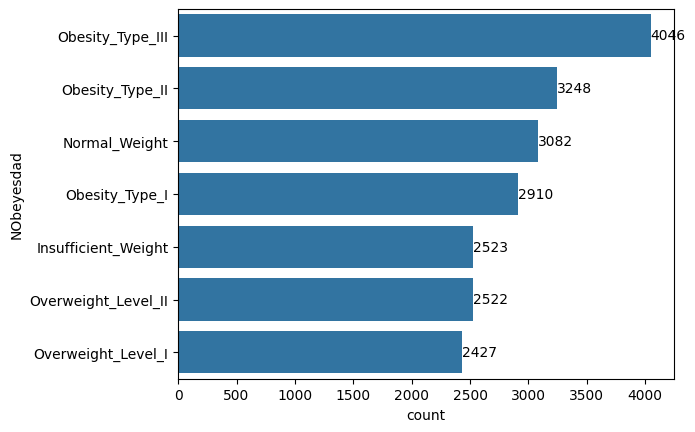

In [14]:
ax = sns.countplot(y='NObeyesdad',data=df_train, order=df_train.NObeyesdad.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()
plt.close()

The dataset is quite balanced, there are no big differences between the classification categories.

##### Gender

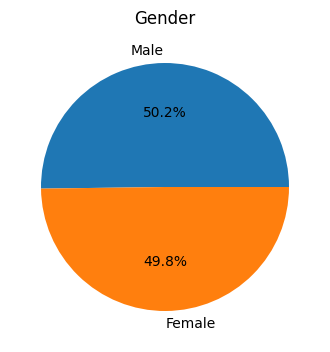

In [15]:
plt.figure(figsize=(4,6))
plt.pie(df_train.Gender.value_counts(), labels=df_train.Gender.unique(), autopct='%1.1f%%')
plt.title('Gender')
plt.show()

The distribution of gender is balanced in the dataset.

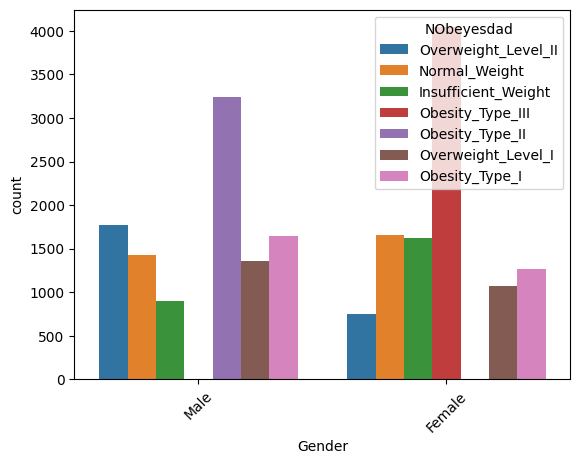

In [16]:
sns.countplot(x="Gender", data=df_train, hue="NObeyesdad")
plt.xticks(rotation=45)
plt.show()
plt.close()

- Obesity_Type_II is most common in **men**.
- Obesity_Type_III is most common in **women**.

##### Family history

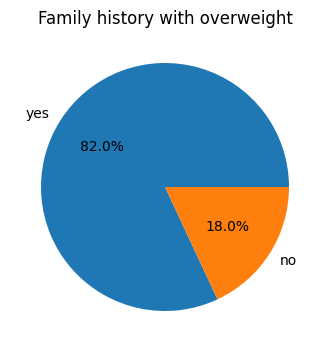

In [17]:
plt.figure(figsize=(4,6))
plt.pie(df_train.family_history_with_overweight.value_counts(), labels=df_train.family_history_with_overweight.unique(), autopct='%1.1f%%')
plt.title('Family history with overweight')
plt.show()

82% of respondents have a family history of being overweight.

##### Frequent consumption of high caloric food (FAVC)

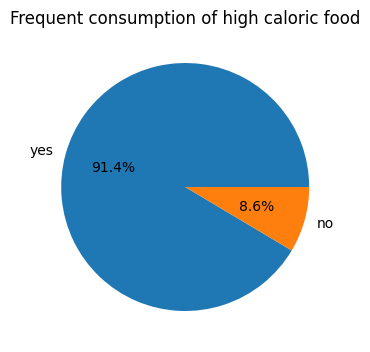

In [18]:
plt.figure(figsize=(4,6))
plt.pie(df_train.FAVC.value_counts(), labels=df_train.FAVC.unique(), autopct='%1.1f%%')
plt.title('Frequent consumption of high caloric food')
plt.show()

82% of people consume high caloric food.

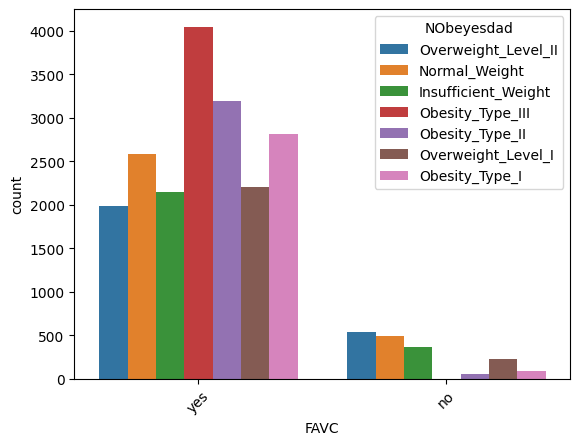

In [19]:
sns.countplot(x="FAVC", data=df_train, hue="NObeyesdad")
plt.xticks(rotation=45)
plt.show()
plt.close()

##### Consumption of food between meals (CAEC)

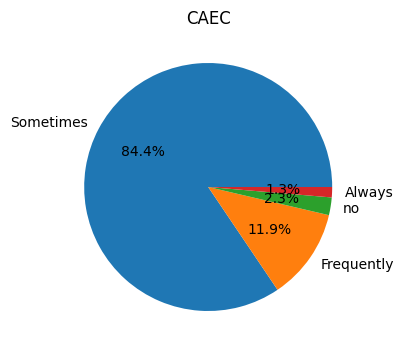

In [20]:
plt.figure(figsize=(4,6))
plt.pie(df_train.CAEC.value_counts(), labels=df_train.CAEC.unique(), autopct='%1.1f%%')
plt.title('CAEC')
plt.show()

84.4% of people **sometimes** consume food between main meals.

##### Smoke

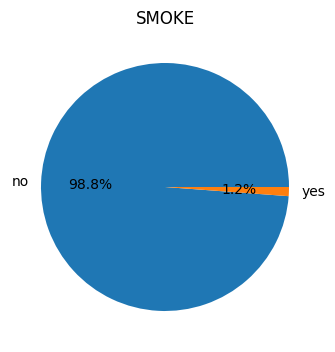

In [21]:
plt.figure(figsize=(4,6))
plt.pie(df_train.SMOKE.value_counts(), labels=df_train.SMOKE.unique(), autopct='%1.1f%%')
plt.title('SMOKE')
plt.show()

##### Calories consumption monitoring (SCC)

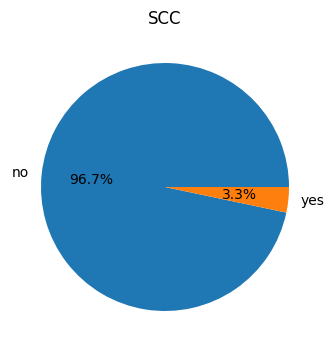

In [22]:
plt.figure(figsize=(4,6))
plt.pie(df_train.SCC.value_counts(), labels=df_train.SCC.unique(), autopct='%1.1f%%')
plt.title('SCC')
plt.show()

##### Consumption of alcohol (CALC)

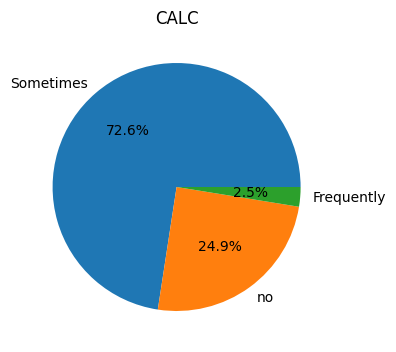

In [23]:
plt.figure(figsize=(4,6))
plt.pie(df_train.CALC.value_counts(), labels=df_train.CALC.unique(), autopct='%1.1f%%')
plt.title('CALC')
plt.show()

##### Transportation used (MTRANS)

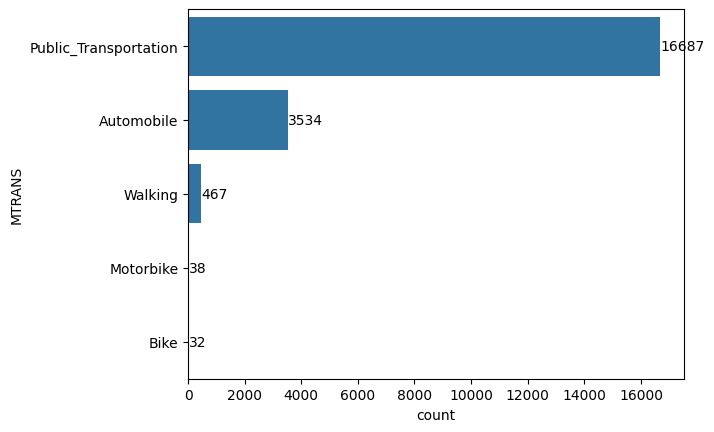

In [24]:
ax = sns.countplot(y="MTRANS",data=df_train, order=df_train.MTRANS.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()
plt.close()

A small number of people prefer walking and cycling.

Almost all categorical variables are not distributed equally.

### Numerical

In [25]:
num_features = df_train.select_dtypes(include=['number']).columns
num_features = num_features.drop('id')
num_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

- Frequency of consumption of vegetables (FCVC), 
- Number of main meals (NCP), 
- Consumption of water daily (CH20), 
- Physical activity frequency (FAF), 
- Time using technology devices (TUE).

#### Distribution of numerical features

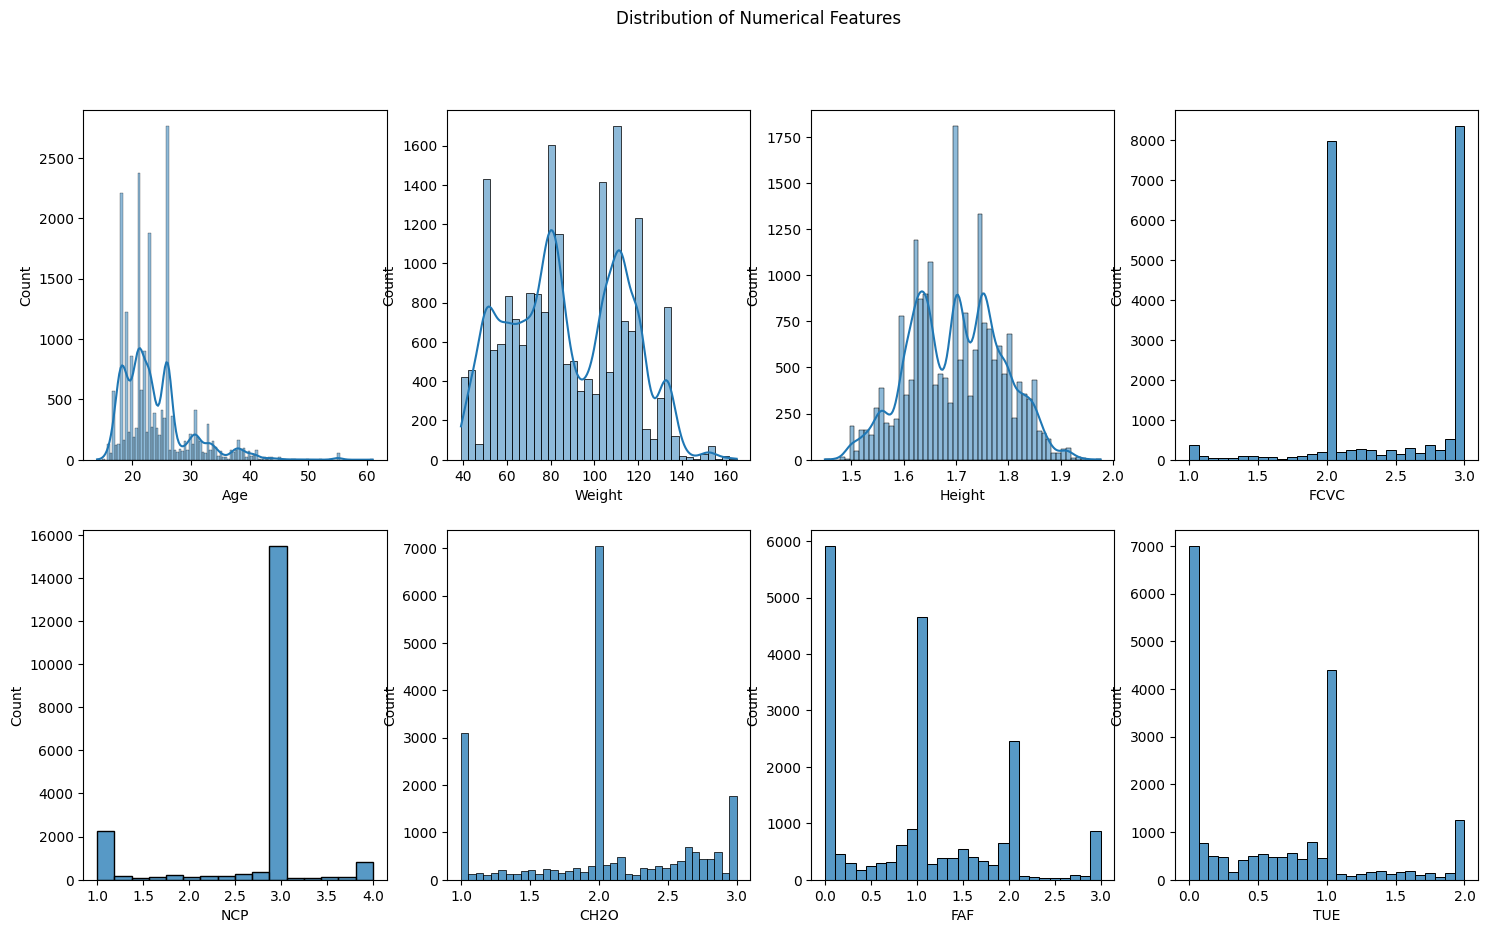

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features')

sns.histplot(ax=axes[0, 0], data=df_train, x="Age", kde=True)
sns.histplot(ax=axes[0, 1], data=df_train, x="Weight", kde=True)
sns.histplot(ax=axes[0, 2], data=df_train, x="Height", kde=True)
sns.histplot(ax=axes[0, 3], data=df_train, x="FCVC")
sns.histplot(ax=axes[1, 0], data=df_train, x="NCP")
sns.histplot(ax=axes[1, 1], data=df_train, x="CH2O")
sns.histplot(ax=axes[1, 2], data=df_train, x="FAF")
sns.histplot(ax=axes[1, 3], data=df_train, x="TUE")
plt.show()

- Age, Weight and Height look approximately normally distributed.
- Age is little skewed (many of the observations are from young people).

### Two variables

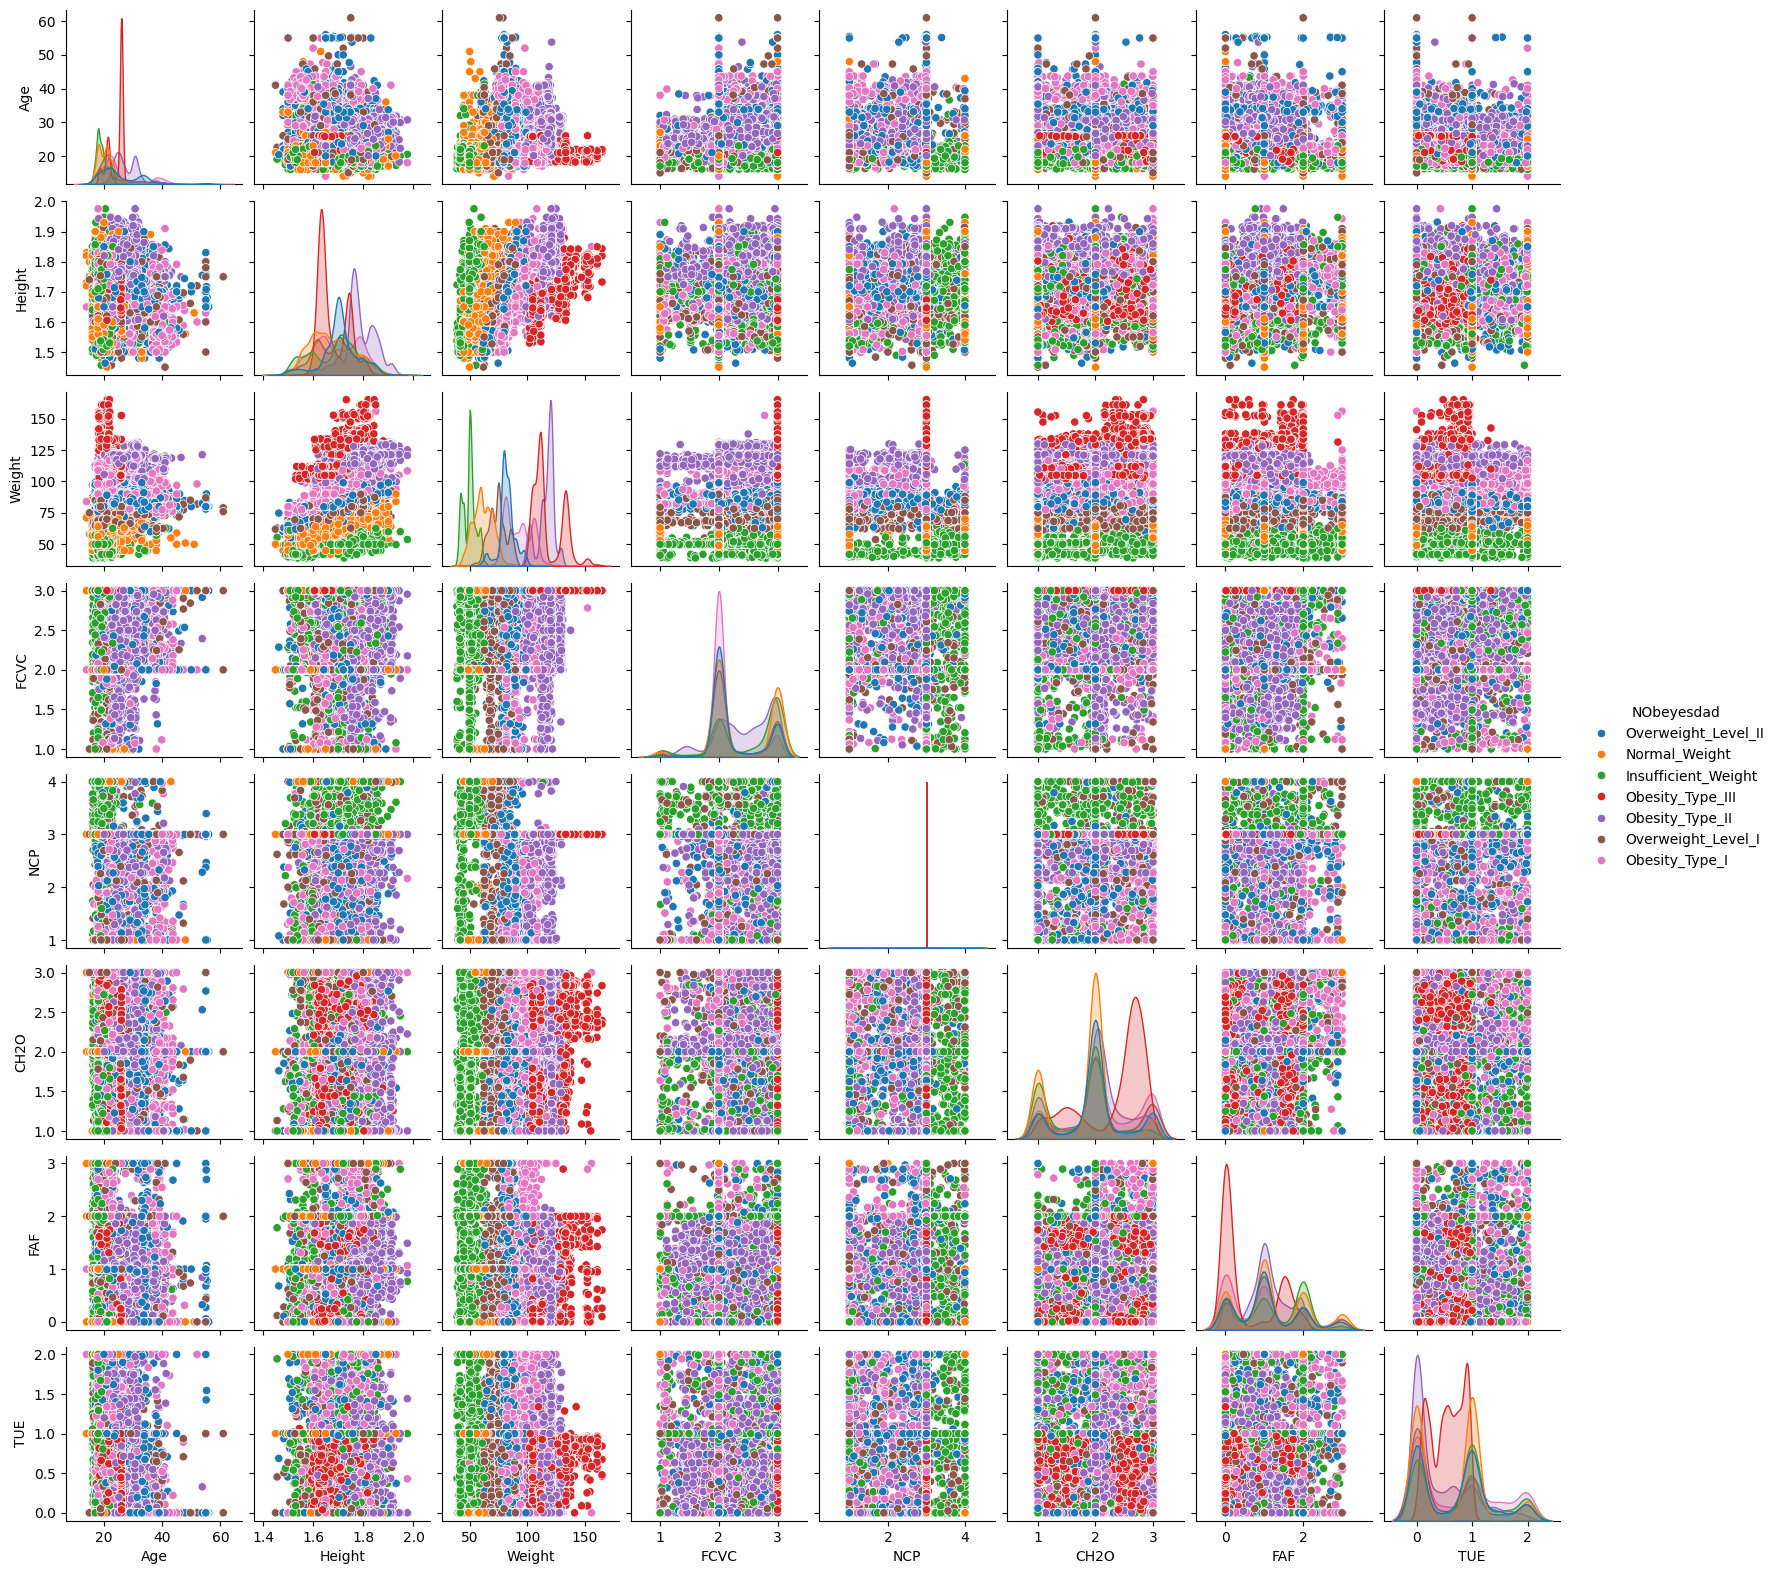

In [27]:
sns.pairplot(df_train.drop('id',axis=1),hue='NObeyesdad', height=2)
plt.show()
plt.close()

A more obvious clustering can be seen between the variables Weight and Height.

#### Distribution of Weight within NObeyesdad

In [28]:
my_order = df_train.groupby('NObeyesdad').Weight.mean().sort_values(ascending=False).index

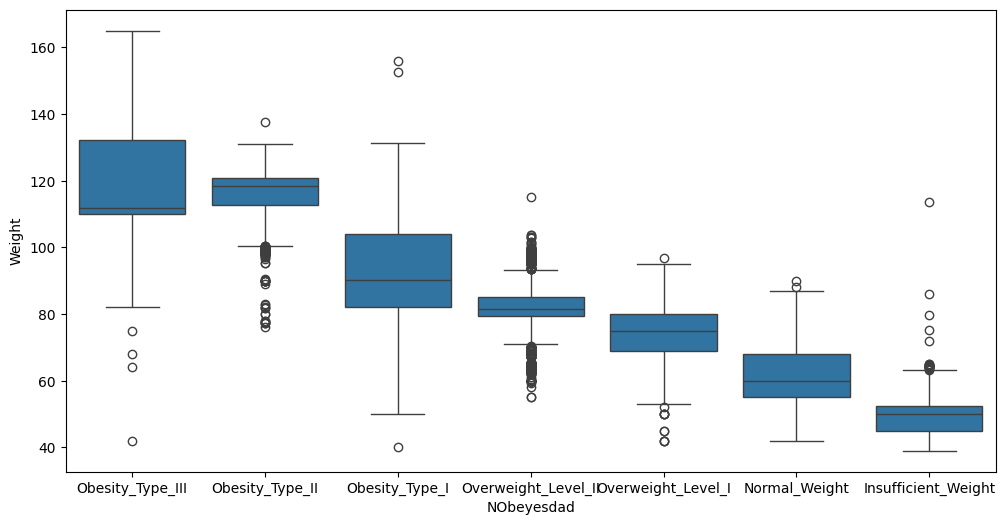

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, x='NObeyesdad', y='Weight', order=my_order)
plt.show()

The graph shows the inconsistency between the median of Obesity_Type_III and Obesity_Type_II.

#### Distribution of Age within NObeyesdad

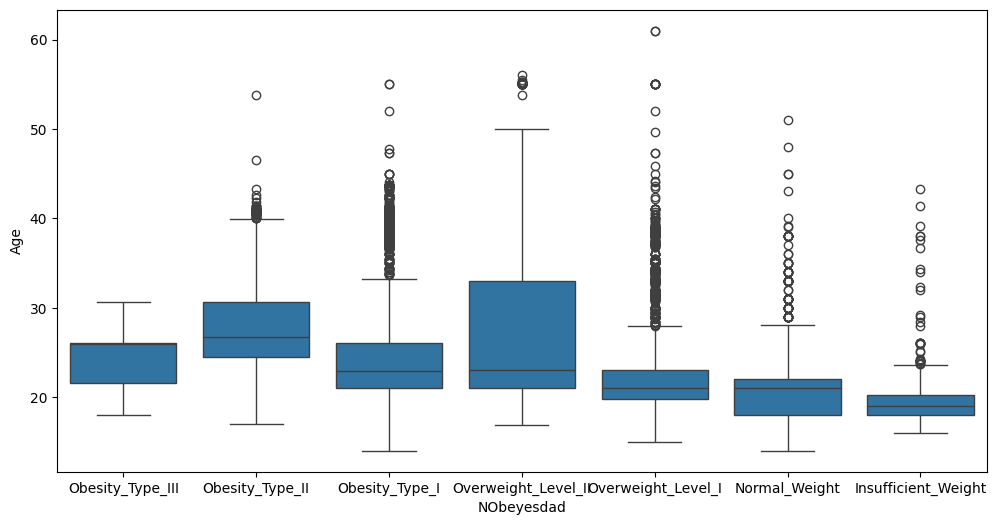

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, x='NObeyesdad', y='Age', order=my_order)
plt.show()

Normal and insufficient weight occurs in the youngest people.

### Heatmap

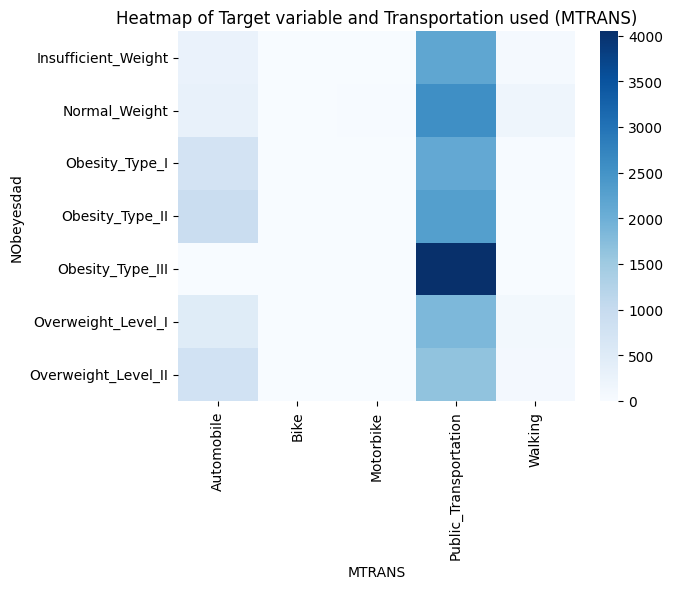

In [31]:
# Creating a heatmap for two categorical variables
heatmap_data = pd.crosstab(df_train['NObeyesdad'], df_train['MTRANS'])
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Heatmap of Target variable and Transportation used (MTRANS)')
plt.show()
plt.close()

In [32]:
numeric_df = df_train.select_dtypes(exclude=['object'])
corr_matrix = numeric_df.corr()

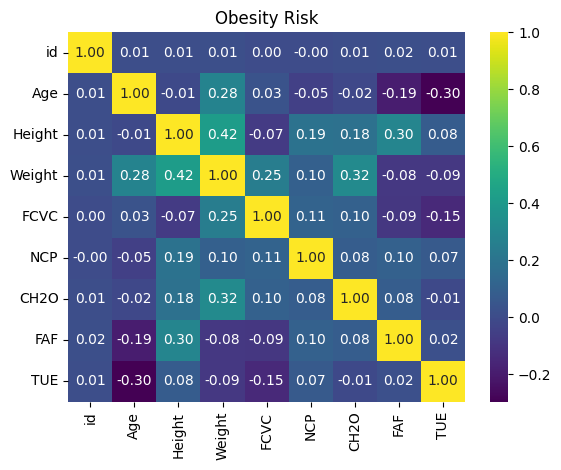

In [33]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Obesity Risk")
plt.show()
plt.close()

The heatmap shows that the highest positive correlation is between Weight and Height.

# 1.Iteration

## Model selection

- Try multiple models in a basic setup and track the results. 
- Selecting model with best score and then do other iterations and improve  results.

### Data preprocessing

In [67]:
#Function to preprocess data
#Drop ID and NObeyesdad (label)
#Drop string columns

def select_numerical_columns(data):
    data_copy = data.copy()

    for var in data_copy.columns:
        if var in ["id", "NObeyesdad"]:     #  "id" does not contain predictive information
            data_copy.drop(var, axis = 1, inplace = True)
    string_columns = data_copy.select_dtypes(include=['object']).columns
    for col in data_copy.columns:
        if col in string_columns:
            data_copy.drop(col, axis = 1, inplace = True)

    return data_copy

In [35]:
#Labels for training
y = df_train[['NObeyesdad']]

In [36]:
y = y.to_numpy().ravel()

In [37]:
y.shape

(20758,)

In [69]:
X = select_numerical_columns(df_train)
X_kaggle = select_numerical_columns(df_test_kaggle)  #The test dataset; the objective is to predict the class of "NObeyesdad" for each row and upload results on Kaggle.

In [71]:
X

Age    Height      Weight      FCVC       NCP      CH2O  \
0      24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1      18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2      18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3      20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4      31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...          ...       ...         ...       ...       ...       ...   
20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            FAF       TUE  
0      0.000000  0.976473  
1      1.000000  1.000000  
2      0.866045  1.673584  
3      1.467863  0.780199  
4      1.967973  0.931721  
...         ...       ...  
20753  1.330519  0.196680  
20754  2.000000  1.000000  
20755  1.158040  1.198439  
20756  0.000000  0.973834  
20757  0.684487  0.713823  

[20758 rows x 8 columns]

### Modelling

In [40]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
#Defining the function to train multiple classifiers
def train_classifiers(X_train, y_train, X_test, y_test):

    # Define a list of classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "Gradient Boosting Classifier": GradientBoostingClassifier(),
        "Decision Tree": DecisionTreeClassifier()
    }

    trained_classifiers = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        trained_classifiers[name] = clf

        # Evaluate the model
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"The accuracy of {clf} is {accuracy}")

    return trained_classifiers

In [42]:
#Fitting each classifier and  
trained_classifiers = train_classifiers(X_train, y_train, X_test, y_test)

The accuracy of RandomForestClassifier() is 0.8783718689788054
The accuracy of SVC() is 0.6859344894026975
The accuracy of GradientBoostingClassifier() is 0.8921001926782274
The accuracy of DecisionTreeClassifier() is 0.8347784200385356


In [43]:
#Predicting with winner classifier on test data for uploading results to Kaggle
gradient_boosting_cls = trained_classifiers["Gradient Boosting Classifier"]
y_pred_kaggle = gradient_boosting_cls.predict(X_kaggle)

### Submission to Kaggle

In [50]:
df_test_kaggle

Age    Height      Weight      FCVC       NCP      CH2O  \
0      26.899886  1.848294  120.644178  2.938616  3.000000  2.825629   
1      21.000000  1.600000   66.000000  2.000000  1.000000  3.000000   
2      26.000000  1.643355  111.600553  3.000000  3.000000  2.621877   
3      20.979254  1.553127  103.669116  2.000000  2.977909  2.786417   
4      26.000000  1.627396  104.835346  3.000000  3.000000  2.653531   
...          ...       ...         ...       ...       ...       ...   
13835  23.327836  1.721384   78.030383  2.813234  3.000000  1.000000   
13836  29.000000  1.590000   62.000000  3.000000  3.000000  2.000000   
13837  22.935612  1.585547   44.376637  3.000000  2.273740  2.000000   
13838  21.000000  1.620000   53.000000  2.000000  3.000000  2.000000   
13839  26.490926  1.812259  120.980508  2.744994  3.000000  2.205977   

            FAF       TUE  
0      0.855400  0.000000  
1      1.000000  0.000000  
2      0.000000  0.250502  
3      0.094851  0.000000  
4      0.000000  0.741069  
...         ...       ...  
13835  0.807076  0.778632  
13836  0.000000  0.000000  
13837  1.949840  1.000000  
13838  3.000000  2.000000  
13839  1.304291  0.630866  

[13840 rows x 8 columns]

In [72]:
new_submission = df_test_kaggle[["id"]]
new_submission['NObeyesdad'] = y_pred_kaggle
new_submission.to_csv("class_obesity_prediction.csv", index = False)

/var/folders/0c/k6vzh9lj46q_0mvnxq9cxqx00000gn/T/ipykernel_15334/58569151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_submission['NObeyesdad'] = y_pred_kaggle


In [73]:
new_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [74]:
#A sample submission file
df_sub.head()

id     NObeyesdad
0  20758  Normal_Weight
1  20759  Normal_Weight
2  20760  Normal_Weight
3  20761  Normal_Weight
4  20762  Normal_Weight

# 2.Iteration

## One Hot Encoding

### Preprocessing

In [92]:
def preprocess_data(data):
    data_copy = data.copy()

    for var in data_copy.columns:
        if var in ["id", "NObeyesdad"]:
            data_copy.drop(var, axis = 1, inplace = True)
    text_columns = data_copy.select_dtypes(include=['object'])
    for col in text_columns:
        dummies = pd.get_dummies(data_copy[col], prefix=col)
        data_copy.drop(col, axis=1, inplace=True)
        data_copy = pd.concat([data_copy, dummies], axis=1)

    return data_copy

In [111]:
X = preprocess_data(df_train)
X_kaggle = preprocess_data(df_test_kaggle)

In [112]:
print(X.shape)
print(X_kaggle.shape)

(20758, 30)
(13840, 31)


- There is one more variable in testing dataset.

In [84]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [85]:
X_kaggle.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

- The test dataset has an extra variable **"CALC_Always"**. Therefore, to make the model work well, I remove it.


In [113]:
X_kaggle = X_kaggle.drop("CALC_Always", axis = 1)

In [78]:
X.head()

Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573  0.000000   
1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000  1.000000   
2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378  0.866045   
3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061  1.467863   
4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848  1.967973   

        TUE  Gender_Female  Gender_Male  ...  SCC_no  SCC_yes  \
0  0.976473          False         True  ...    True    False   
1  1.000000           True        False  ...    True    False   
2  1.673584           True        False  ...    True    False   
3  0.780199           True        False  ...    True    False   
4  0.931721          False         True  ...    True    False   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0            False            True    False              False        False   
1            False           False     True               True        False   
2            False           False     True              False        False   
3            False            True    False              False        False   
4            False            True    False              False        False   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0             False                          True           False  
1             False                         False           False  
2             False                          True           False  
3             False                          True           False  
4             False                          True           False  

[5 rows x 30 columns]

### Training model

In [114]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
## Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Initialize the classifier
gbc_clf = GradientBoostingClassifier(random_state=42)

In [124]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [127]:
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  26.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  27.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=2

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [128]:
# Printing the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.906419658818302


In [142]:
# Initializing and training the model with the best parameters
best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9039017341040463


In [143]:
#Predicting with best model
y_pred_kaggle = best_model.predict(X_kaggle)

### Submission to Kaggle

In [144]:
submission_2 = df_test_kaggle[["id"]]
submission_2['NObeyesdad'] = y_pred_kaggle
submission_2.to_csv("class_obesity_prediction_2.csv", index = False)

/var/folders/0c/k6vzh9lj46q_0mvnxq9cxqx00000gn/T/ipykernel_15334/2801002239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_2['NObeyesdad'] = y_pred_kaggle


# 3.Iteration

## Feature selection

- Feature selection process using a greedy approach. 
- The goal is to iteratively select the best features to include in a model in order to minimize the classification error.

In [98]:
vars_best = []
vars_to_select = X_train.columns
errors_gradual = []

while len(vars_to_select) > 0:
    errors =[]
    for var in vars_to_select:
        vars = vars_best.copy()
        vars.append(var)
        x_train_selected = X_train[vars]
        x_test_selected = X_test[vars]
        model = GradientBoostingClassifier()
        model.fit(x_train_selected, y_train)
        y_pred = model.predict(x_test_selected)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
    best_cal = list(vars_to_select)[np.argmin(errors)]
    vars_best.append(best_cal)
    vars_to_select = list(set(vars_to_select).difference([best_cal]))
    errors_gradual.append(np.min(errors))

    print(vars_best)
    print(len(vars_to_select))

['Weight']
29
['Weight', 'Height']
28
['Weight', 'Height', 'FCVC']
27
['Weight', 'Height', 'FCVC', 'TUE']
26
['Weight', 'Height', 'FCVC', 'TUE', 'Age']
25
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male']
24
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male', 'family_history_with_overweight_yes']
23
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male', 'family_history_with_overweight_yes', 'CH2O']
22
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male', 'family_history_with_overweight_yes', 'CH2O', 'SCC_no']
21
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male', 'family_history_with_overweight_yes', 'CH2O', 'SCC_no', 'MTRANS_Motorbike']
20
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male', 'family_history_with_overweight_yes', 'CH2O', 'SCC_no', 'MTRANS_Motorbike', 'family_history_with_overweight_no']
19
['Weight', 'Height', 'FCVC', 'TUE', 'Age', 'Gender_Male', 'family_history_with_overweight_yes', 'CH2O', 'SCC_no', 'MTRANS_Motorbike', 'family_history_

In [99]:
errors_gradual

[0.23530828516377644,
 0.1307803468208093,
 0.11873795761078998,
 0.11151252408477841,
 0.10910404624277459,
 0.10452793834296725,
 0.10091522157996147,
 0.0977842003853564,
 0.09682080924855496,
 0.095616570327553,
 0.095616570327553,
 0.095616570327553,
 0.095616570327553,
 0.09585741811175341,
 0.09465317919075145,
 0.09272639691714835,
 0.09200385356454721,
 0.09128131021194608,
 0.09128131021194608,
 0.09128131021194608,
 0.09272639691714835,
 0.09344894026974948,
 0.09417148362235073,
 0.09248554913294793,
 0.09441233140655103,
 0.09344894026974948,
 0.09489402697495186,
 0.09489402697495186,
 0.09489402697495186,
 0.09609826589595372]

In [100]:
print(np.min(errors_gradual))

0.09128131021194608


In [101]:
errors_gradual.index(min(errors_gradual))

17

### Selected features

In [102]:
selected_vars = vars_best[:17]

In [103]:
selected_vars

['Weight',
 'Height',
 'FCVC',
 'TUE',
 'Age',
 'Gender_Male',
 'family_history_with_overweight_yes',
 'CH2O',
 'SCC_no',
 'MTRANS_Motorbike',
 'family_history_with_overweight_no',
 'SCC_yes',
 'Gender_Female',
 'CALC_no',
 'FAF',
 'MTRANS_Automobile',
 'MTRANS_Bike']

In [130]:
X_train_sel = X_train[selected_vars]
X_test_sel = X_test[selected_vars]

### Training model

In [132]:
model_1 = GradientBoostingClassifier()
model_1.fit(X_train_sel, y_train)
y_pred = model_1.predict(X_test_sel)
error = accuracy_score(y_test, y_pred)
print(error)

0.9079961464354528


In [133]:
#Classification report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.95       524
      Normal_Weight       0.89      0.89      0.89       626
     Obesity_Type_I       0.89      0.88      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.78      0.80      0.79       484
Overweight_Level_II       0.80      0.81      0.80       514

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



In [106]:
X_kaggle = X_kaggle[selected_vars]

In [107]:
#Predicting with selected features on test data for uploading results to Kaggle
y_pred_kaggle = model_1.predict(X_kaggle)

### Submission to Kaggle

In [ ]:
submission_3 = df_test_kaggle[["id"]]
submission_3['NObeyesdad'] = y_pred_kaggle
submission_3.to_csv("class_obesity_prediction_3.csv", index = False)

The code implements a greedy feature selection algorithm using a Gradient Boosting Classifier to evaluate the performance of different feature subsets. At each iteration, it:

- Iterates over all remaining features.
- Trains a model with the current best feature set plus each candidate feature.
- Computes the classification error for each candidate feature.
- Selects the feature that minimizes the error.
- Adds this feature to the best feature set.
- Removes the selected feature from the set of candidate features.
- Repeats the process until no features are left to select from.

This results in a gradually increasing list of features that aim to minimize the classification error iteratively.